## practical example 1

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## loading the raw data

In [2]:
raw_data=pd.read_csv('C:/Users/Dell/Downloads/1.04. Real-life example.csv')

In [3]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## preprocessing

## exploring the descriptive statistics variables

In [4]:
raw_data.describe(include='all')
#include=all is used to get the descriptive of both the catagorical and newmerical variables also

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# implementing model into the regresssion will be a very hard task cause there are 312 models so approx 312 dummies
#so drop the model,wont loose much variability

## determining the variable of interest

In [6]:
#droping the model vraible using pandas drop function that takes column to be droped and axis,axis=0 is row,axis=1 is column
data=raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [7]:
#price and engine volume have some missing values as their count does not match with the others

## dealing with missing values

In [8]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [9]:
#the below method will sum all the missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
# drop those
data_no=data.dropna(axis=0)
data_no.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## exploring the probability distribtuion frequency

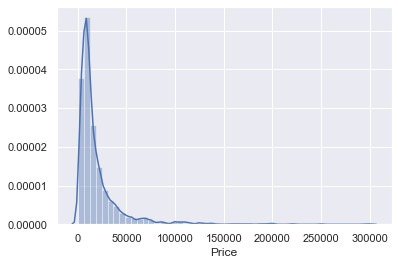

In [11]:
# use seaborn
sns.distplot(data_no['Price'])
#outliers are present that lie at an abnormal distance from the data

## dealing with outliers

In [12]:
q=data_no['Price'].quantile(0.99)
#removing data less than 0.99
data_1=data_no[data_no['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


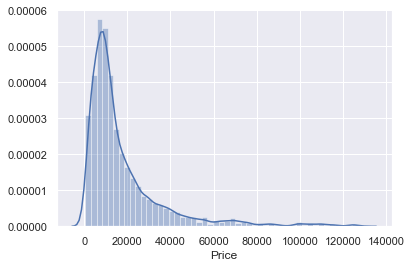

In [13]:
sns.distplot(data_1['Price'])

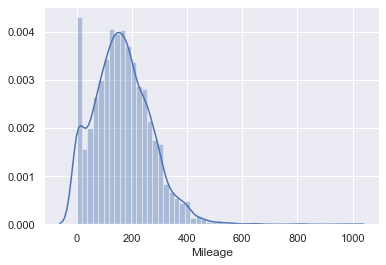

In [14]:
sns.distplot(data_1['Mileage'])

In [15]:
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


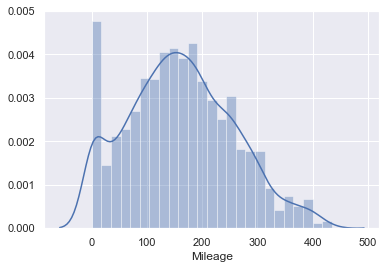

In [16]:
sns.distplot(data_2['Mileage'])

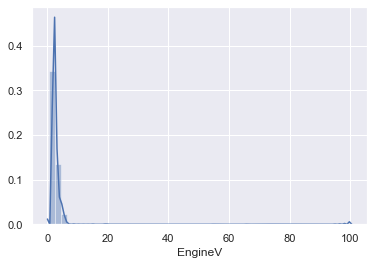

In [17]:
sns.distplot(data_2['EngineV'])

In [18]:
# interval where engine volume should fall is b/w 0.6 and 0.5
#natural domain should be 6.5
data_3=data_2[data_2['EngineV']<6.5]

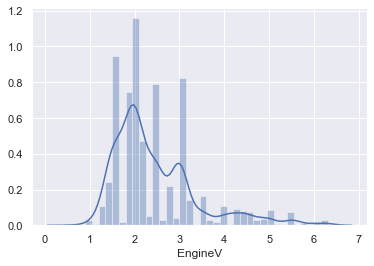

In [19]:
sns.distplot(data_3['EngineV'])

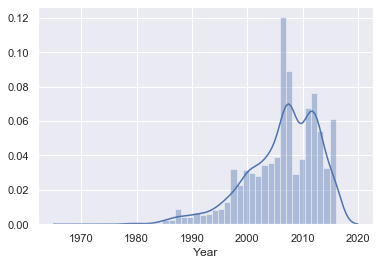

In [20]:
sns.distplot(data_3['Year'])

In [21]:
q=data_3['Year'].quantile(0.01)
# keep all the percentiles that are higher
data_4=data_3[data_3['Year']>q]

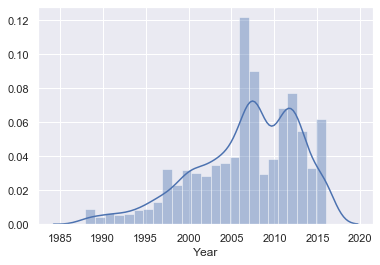

In [22]:
sns.distplot(data_4['Year'])

In [23]:
# method used for reseting the indexes is 
data_cleaned=data_4.reset_index(drop=True)
#DROP=TRUE IS TO COMPLETELY FORGET THE OLD INDEX
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## checking the OLS assumptions

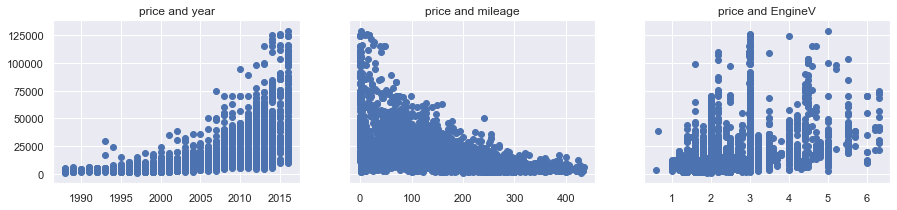

In [24]:
# catagorical variables will be used like dummies
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('price and year')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.set_title('price and mileage')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.set_title('price and EngineV')
plt.show()

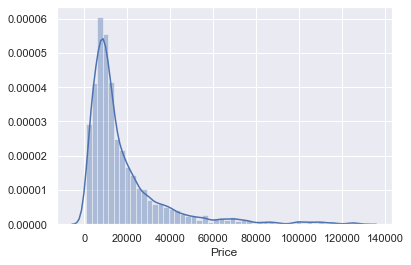

In [25]:
sns.distplot(data_cleaned['Price'])

## relaxing the assumptions

In [26]:
# we use log transformation to transform the data to a linear one
#numpy has the method to calucluate the log

In [27]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


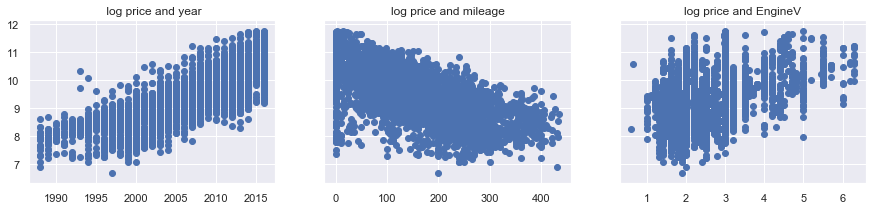

In [28]:
# plot them again but with log price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log price'])
ax1.set_title(' log price and year')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['log price'])
ax2.set_title('log price and mileage')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['log price'])
ax3.set_title('log price and EngineV')
plt.show()

In [29]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

## multicollinartity

In [30]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log price'], dtype=object)

In [31]:
# we expect some degree of multicollinearity in the data cause year and mileage can be correlated as look below
#newer the car lesser is the mileage
# to check multicollinearity we import the variance inflation factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# use a variable and put all the feature whoes multicollinearity can be checked
variables = data_cleaned[['Mileage','Year','EngineV']]
# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns


In [32]:
vif
#vif=1 no multicollinearity
# 1<vif<5 pretty ok

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [33]:
# sice year is the one that is most multicollinarited remove it
data_no_multi=data_cleaned.drop(['Year'],axis=1)

## create dummy variables

In [34]:
# pandas has a get dummy function that spots all the catagorical variables and gets the dummy for them
# IF WE HAVE ONLY N CATAGORIES THERE WILL BE ONLY N-1 DUMMIES
data_dummies=pd.get_dummies(data_no_multi,drop_first=True)
# drop first=true is in order to make sure no dummy is created for audi
data_dummies.head()


,Mileage,EngineV,log price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### rearranging the columns

In [35]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [36]:
col=['log price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [37]:
data_processed=data_dummies[col]

In [38]:
data_processed.head()

,log price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## a small exercise to do

In [39]:
# PART 1 create vif's for all the features(including the dummies)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=data_processed[['log price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
vif["Features"] = variable.columns                        

In [40]:
vif

,VIF,Features
0,41.981260,log price
1,4.460434,Mileage
2,13.445639,EngineV
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


In [41]:
# PART2 calculate the variance inflation factor (VIF) of all variables including the dummiesbut without the dependent variable
#VIF for log price is very high hence drop it
variable=data_processed.drop(['log price'],axis=1)
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
vif["Features"] = variable.columns  
vif

,VIF,Features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


In [42]:
## PART3 VIF WITHOUT DROPING THE FIRST DUMMY
data_new=pd.get_dummies(data_no_multi)
data_new.head()

,Mileage,EngineV,log price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [43]:
data_new1=data_new.drop(['log price'],axis=1)
data_new1.head()

,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_new1
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif
# we have included multicollinearity

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.266554,Mileage
1,1.575735,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


## linear regression

### declare inputs and targets

In [45]:
target=data_processed['log price']
inputs=data_processed.drop(['log price'],axis=1)

## standarization

In [46]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scale_input=scale.transform(inputs)

## train test split

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(scale_input,target,random_state=356,test_size=0.2)

## create a linear regression

In [49]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_hat=reg.predict(x_train)

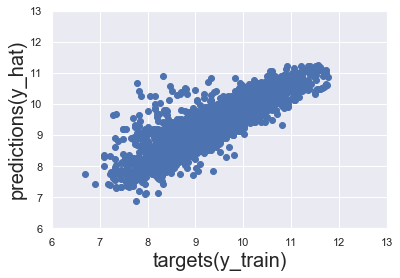

In [51]:
# creating a scatter plot of the target(y train) and the predictions(y_hat)
plt.scatter(y_train,y_hat)
plt.xlabel('targets(y_train)',size=20)
plt.ylabel('predictions(y_hat)',size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'residual PDF')

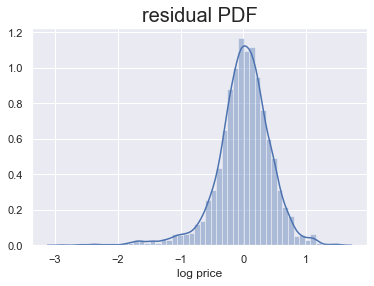

In [52]:
# residual plot is the difference between the targets and the predictions
sns.distplot(y_train-y_hat)
plt.title('residual PDF',size=20)

In [53]:
reg.score(x_train,y_train)

0.7468516284184064

## weights and bias

In [54]:
reg.intercept_

9.413962337140893

In [55]:
reg.coef_

array([-0.46133327,  0.21036545,  0.02433127,  0.01174785, -0.13819178,
       -0.18456294, -0.05390937, -0.07716446, -0.14315209, -0.10494565,
       -0.19162199, -0.11744266, -0.15680434, -0.12372496, -0.02782508,
       -0.14719026,  0.31988124])

In [56]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['features'])
reg_summary['weights']=reg.coef_
reg_summary
# weights that are positive shows that as the feature increaes in value so thus the log price and price
#weights that are negative show that as the feature increaes in value the log price and price decreses
#when all included dummies are zero then the droped dummy is one

,features,weights
0,Mileage,-0.461333
1,EngineV,0.210365
2,Brand_BMW,0.024331
3,Brand_Mercedes-Benz,0.011748
4,Brand_Mitsubishi,-0.138192
5,Brand_Renault,-0.184563
6,Brand_Toyota,-0.053909
7,Brand_Volkswagen,-0.077164
8,Body_hatch,-0.143152
9,Body_other,-0.104946


In [57]:
# to display the brands in a simpler way
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## testing

In [58]:
y_hat_test=reg.predict(x_test)

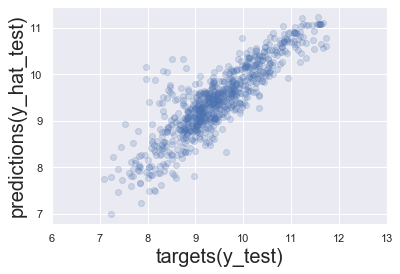

In [61]:
# plot the test targests against the prdicted value to see what happens
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('targets(y_test)',fontsize=20)
plt.ylabel('predictions(y_hat_test)',fontsize=20)
plt.xlim(6,13)
plt.xlim(6,13)
plt.show()
# for higher prices we have a higher concen of the points near to the 45 degree line but for lower no
#alpha specifies the proportional opacity of the pts takes values from 0 to 1
#more concentarted the color more concentration of pts,paler the colour lower concen of pts

In [63]:
# creating a new data frame
# unfortunately these are the predictions for the log prices and not the prices so we use the numpy method to obtain for prices
df=pd.DataFrame(np.exp(y_hat_test),columns=['predictions'])
df.head()

,predictions
0,30724.668237
1,32851.782949
2,20251.792010
3,39040.506132
4,8762.553341


In [65]:
#place the targets next to them
df['targets']=y_test
df

,predictions,targets
0,30724.668237,NaN
1,32851.782949,NaN
2,20251.792010,NaN
3,39040.506132,NaN
4,8762.553341,NaN
...,...,...
769,9204.466709,NaN
770,9612.942148,NaN
771,12287.865536,NaN
772,15345.111298,NaN


In [66]:
## unformtunately there are a lot of missing data
y_test
# we reliase that there were indexing

357     10.305614
1476    10.338511
1895    10.925129
3311    11.665647
633      9.388487
          ...    
2437     9.137770
2849     9.082507
1080     9.487972
2733     9.814656
2017     9.525151
Name: log price, Length: 774, dtype: float64

In [68]:
# so when we addded y_test to df pandas tried to map the indexed
#we need to forget the indexes for that we rewrite it as
y_test=y_test.reset_index(drop=True)
y_test.head()

0    10.305614
1    10.338511
2    10.925129
3    11.665647
4     9.388487
Name: log price, dtype: float64

In [71]:
df['targets']=np.exp(y_test)
df1=df.drop(['target'],axis=1)
df1

,predictions,targets
0,30724.668237,29900.0
1,32851.782949,30900.0
2,20251.792010,55555.0
3,39040.506132,116500.0
4,8762.553341,11950.0
...,...,...
769,9204.466709,9300.0
770,9612.942148,8800.0
771,12287.865536,13200.0
772,15345.111298,18300.0


In [74]:
df1['residual']=df1['targets']-df1['predictions']
df1['% difference']=np.absolute(df1['residual']/df1['targets']*100)
df1

,predictions,targets,residual,% difference
0,30724.668237,29900.0,-824.668237,2.758088
1,32851.782949,30900.0,-1951.782949,6.316450
2,20251.792010,55555.0,35303.207990,63.546410
3,39040.506132,116500.0,77459.493868,66.488836
4,8762.553341,11950.0,3187.446659,26.673194
...,...,...,...,...
769,9204.466709,9300.0,95.533291,1.027240
770,9612.942148,8800.0,-812.942148,9.237979
771,12287.865536,13200.0,912.134464,6.910110
772,15345.111298,18300.0,2954.888702,16.146933


In [75]:
df1.describe()

,predictions,targets,residual,% difference
count,774.000000,774.000000,774.000000,774.000000
mean,16675.329794,18846.604729,2171.274934,35.763906
std,13625.275699,20372.996566,10536.800872,59.840245
min,1097.480669,1199.000000,-26377.413794,0.033394
25%,7846.280078,7325.000000,-2005.676326,11.968590
50%,12293.360948,11650.000000,290.680141,23.398591
75%,20704.416171,22375.000000,3648.870592,40.061074
max,75336.548637,125000.000000,84423.196016,785.867563


In [77]:
# sort the differences in percentages by the sort value method
pd.options.display.max_rows=999
df1.sort_values(by=['% difference'])
df1

,predictions,targets,residual,% difference
0,30724.668237,29900.00,-824.668237,2.758088
1,32851.782949,30900.00,-1951.782949,6.316450
2,20251.792010,55555.00,35303.207990,63.546410
3,39040.506132,116500.00,77459.493868,66.488836
4,8762.553341,11950.00,3187.446659,26.673194
5,25893.730417,24300.00,-1593.730417,6.558561
6,18390.460748,18800.00,409.539252,2.178400
7,16291.282090,12999.00,-3292.282090,25.327195
8,2309.411177,1199.00,-1110.411177,92.611441
9,7614.990114,9299.00,1684.009886,18.109580
